# Mobile money in Tanzania

## Import the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [3]:
money_df = pd.read_csv("training.csv")
money_df

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,8378,57,2,3,3,1,2,2,0,1,...,-1,1,4,-5.811335,35.098103,0,1,0,0,1
7090,881,32,1,1,6,3,1,1,0,1,...,-1,1,1,-2.635156,32.945423,1,1,0,0,3
7091,6672,22,2,3,3,3,2,2,0,1,...,-1,4,4,-8.303729,31.059642,0,0,0,0,0
7092,5416,28,2,1,3,1,2,2,0,1,...,-1,1,4,-8.090712,35.836560,1,0,0,1,3


In [4]:
print(money_df.isnull().values.any())
print(money_df.isna().values.any())
money_df.head()

False
False


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


## 2.Basic descriptive statistics for the dataset

In [5]:
money_df.info()
money_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7094 non-null   int64  
 1   Q1                           7094 non-null   int64  
 2   Q2                           7094 non-null   int64  
 3   Q3                           7094 non-null   int64  
 4   Q4                           7094 non-null   int64  
 5   Q5                           7094 non-null   int64  
 6   Q6                           7094 non-null   int64  
 7   Q7                           7094 non-null   int64  
 8   Q8_1                         7094 non-null   int64  
 9   Q8_2                         7094 non-null   int64  
 10  Q8_3                         7094 non-null   int64  
 11  Q8_4                         7094 non-null   int64  
 12  Q8_5                         7094 non-null   int64  
 13  Q8_6              

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


## 3/4.Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

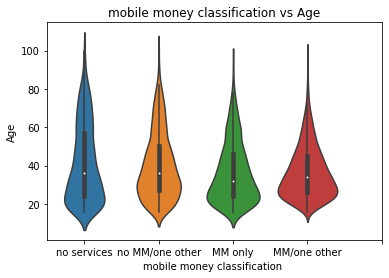

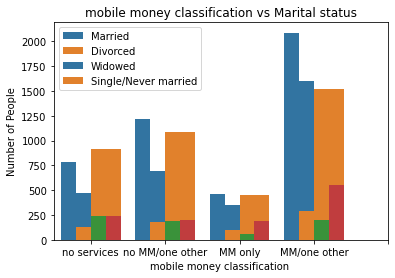

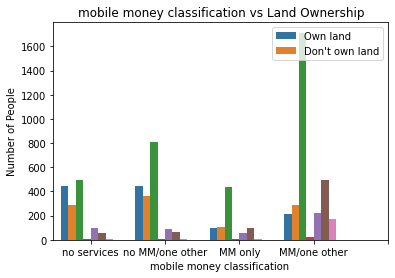

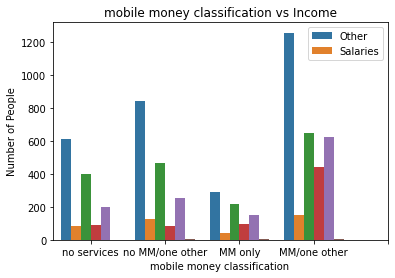

In [14]:
# Age vs Financial services plots/mobile money classification
sns.violinplot(x=money_df['Mobile_money_classification'], y=money_df['Q1'])
plt.title('Mobile money classification vs Age')
plt.xlabel('Mobile money classification ')
plt.xticks(np.arange(5), ('No services', 'No MM/one other', 'MM only', 'MM/one other'))
plt.ylabel('Age')
plt.show()
n

# Gender vs Financial services plots/mobile money classification
sns.countplot(data = money_df, x='Mobile_money_classification', hue='Q2')
plt.title('Mobile money classification vs Gender')
plt.xlabel('Mobile money classification ')
plt.xticks(np.arange(5), ('No services', 'No MM/one other', 'MM only', 'MM/one other'))
plt.ylabel('Number of People')
plt.legend(['Male', 'Female'])
plt.show


# Marital status vs Financial services plots/mobile money classification
sns.countplot(data = money_df, x='Mobile_money_classification', hue='Q3')
plt.title('Mobile money classification vs Marital status')
plt.xlabel('Mobile money classification ')
plt.xticks(np.arange(5), ('No services', 'No MM/one other', 'MM only', 'MM/one other'))
plt.ylabel('Number of People')
plt.legend(['Married', 'Divorced', 'Widowed', 'Single/Never married'])
plt.show()


# Land ownership vs Financial services plots/mobile money classification
sns.countplot(data = money_df, x='Mobile_money_classification', hue='Q4')
plt.title('Mobile money classification vs Land Ownership')
plt.xlabel('Mobile money classification ')
plt.xticks(np.arange(5), ('No services', 'No MM/one other', 'MM only', 'MM/one other'))
plt.ylabel('Number of People')
plt.legend(['Own land', "DonFinancial services plots't own land"])
plt.show()


# Type of income vs Financial services plots/mobile money classification
sns.countplot(data = money_df, x='Mobile_money_classification', hue='Q5')
plt.title('Mobile money classification vs Income')
plt.xlabel('Mobile money classification ')
plt.xticks(np.arange(5), ('No services', 'No MM/one other', 'MM only', 'MM/one other'))
plt.ylabel('Number of People')
plt.legend(['Other', 'Salaries'])
plt.show()

## What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?

The graphs depicting gender vs the use of mobile money show us that women are the highest gender category for the no financial services as well as for mobile money. Men rank higher with the use of both mobile money and at least one other financial service.
This tells us that women may still have been the most disadvantaged when it comes to access to financial services in Tanzania.This could directly affect the growth rate of the country as many women head up household and yet cannot access funds to improve their lives and the lives of their dependents.

Therefore, women are less likely to use financial services. If someone is married, owns land is between the age group of 20 to 40 / has and income source other than salaries they are more likely to use financial services. From these demographic factors we can identify these people as the main target market.